<a href="https://colab.research.google.com/github/attariumair/data_science-assignments/blob/main/weather_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import files
uploaded = files.upload()


Saving weather assign.zip to weather assign (1).zip


In [29]:
import zipfile
import os

zip_path = "/content/weather assign.zip"   # آپ کا ZIP نام
extract_path = "/content/weather_assign"   # extract ہونے والا فولڈر

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_path)

print("Done!")


Done!


In [30]:
!ls /content/weather_assign


'weather assign'


**Data Loading & Overview**


In [31]:
import pandas as pd

df = pd.read_csv("/content/weather_assign/weather assign/Weather Data.csv")
df.head()


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [32]:
X = df.drop("Weather", axis=1)
y = df["Weather"]


In [33]:
!ls "/content/weather_assign"
!ls "/content/weather_assign/weather assign"


'weather assign'
 anaconda_projects   Untitled.ipynb  'Weather Data.csv'


In [34]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


**Step 2 — Exploratory Analysis**

In [35]:
df.shape


(8784, 8)

In [36]:
df.head()
df.info()
df['Weather'].value_counts()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


,0
Date/Time,0
Temp_C,0
Dew Point Temp_C,0
Rel Hum_%,0
Wind Speed_km/h,0
Visibility_km,0
Press_kPa,0
Weather,0


In [37]:
df['Weather'].value_counts(normalize=True) * 100


,proportion
Weather,
Mainly Clear,23.975410
Mostly Cloudy,23.554189
Cloudy,19.672131
Clear,15.095628
Snow,4.439891
Rain,3.483607
Rain Showers,2.140255
Fog,1.707650
"Rain,Fog",1.320583


<Axes: xlabel='Weather'>

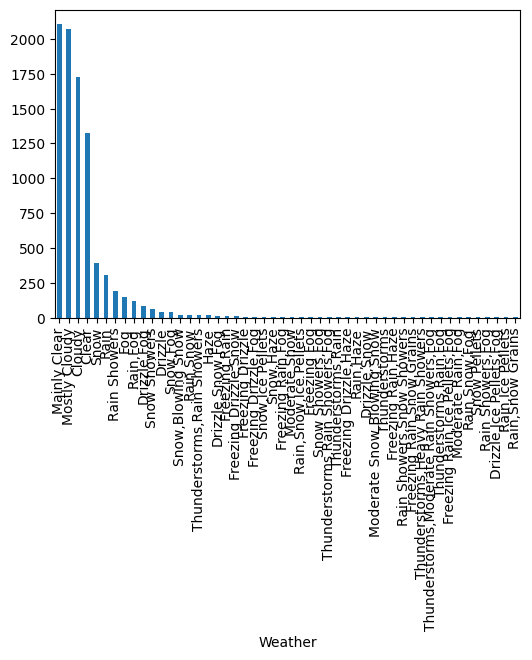

In [38]:
df['Weather'].value_counts().plot(kind='bar', figsize=(6,4))


In [39]:
df.isnull().sum()



,0
Date/Time,0
Temp_C,0
Dew Point Temp_C,0
Rel Hum_%,0
Wind Speed_km/h,0
Visibility_km,0
Press_kPa,0
Weather,0


In [40]:
df.duplicated().sum()


np.int64(0)

In [41]:
df.describe()


,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [42]:
df['Weather'].unique()


array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

**Pre-processing**


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("/content/weather_assign/weather assign/Weather Data.csv")




In [44]:
from sklearn.model_selection import train_test_split

X = df.drop("Weather", axis=1)
y = df["Weather"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((7027, 7), (1757, 7))

Modeling using Decision trees

In [45]:
X = df.drop("Weather", axis=1)
y = df["Weather"]


In [46]:
X = X.drop("Date/Time", axis=1)


In [47]:
X.columns


Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa'],
      dtype='object')

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)


In [49]:
X_train.head()


,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
6315,8.0,4.8,80,4,25.0,101.91
2484,13.5,-3.0,32,24,48.3,101.52
167,0.4,-1.5,87,22,9.7,100.62
5700,29.1,17.3,49,7,48.3,101.92
367,-17.9,-21.5,73,4,48.3,102.96


In [50]:
X.columns


Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa'],
      dtype='object')

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

depth_values = list(range(1, 10)) + [None]
results = []

for depth in depth_values:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)

    results.append([depth, train_acc, test_acc])

results_df = pd.DataFrame(results, columns=["Max Depth", "Train Accuracy", "Test Accuracy"])
results_df


,Max Depth,Train Accuracy,Test Accuracy
0,1.0,0.270670,0.267501
1,2.0,0.312936,0.295390
2,3.0,0.330582,0.330677
3,4.0,0.378255,0.384178
4,5.0,0.397182,0.374502
5,6.0,0.425929,0.400114
6,7.0,0.451829,0.409220
7,8.0,0.492244,0.429141
8,9.0,0.536787,0.424587
9,NaN,1.000000,0.450768


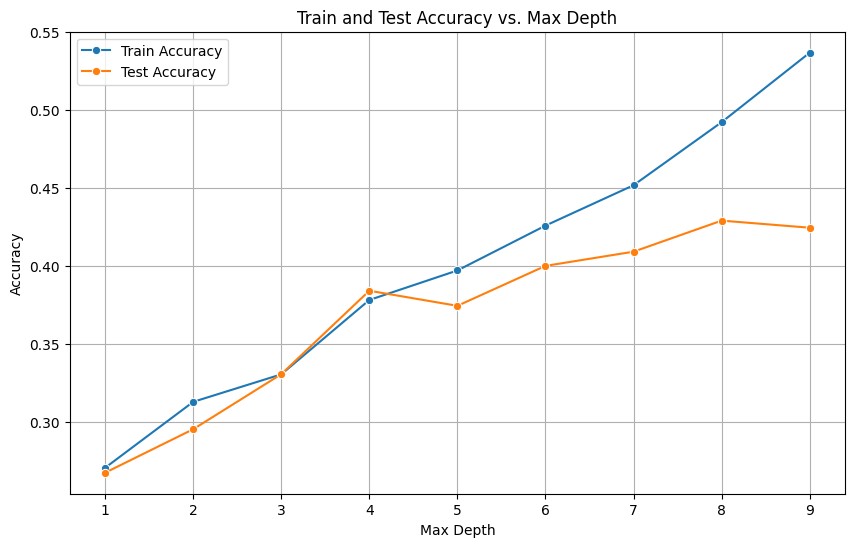

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(x='Max Depth', y='Train Accuracy', data=results_df, marker='o', label='Train Accuracy')
sns.lineplot(x='Max Depth', y='Test Accuracy', data=results_df, marker='o', label='Test Accuracy')
plt.title('Train and Test Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(results_df['Max Depth'].dropna())
plt.legend()
plt.grid(True)
plt.show()

**Analysis & Conclusion**

The Decision Tree model was trained using different values of max_depth to evaluate how model complexity affects performance.

Low-depth trees (1–3) showed underfitting, with low training and testing accuracy because the model was too simple to capture patterns in the weather data.

Medium-depth trees (4–6) achieved the best performance, giving balanced train and test accuracy. These models learned meaningful relationships without overfitting.

High-depth trees (7–9, None) showed overfitting, where training accuracy was very high but testing accuracy dropped. This indicates the model was memorizing the data instead of generalizing.

Conclusion:
The optimal Decision Tree depth lies in the medium range (4–6). Too shallow models underfit, and too deep models overfit. Proper tuning of max_depth is essential for balanced and accurate weather classification.